In [29]:
import pandas as pd
import pymysql
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager as fm
import warnings
import random

warnings.filterwarnings("ignore")
plt.style.use ('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 7.5
plt.rcParams['axes.unicode_minus'] = False

In [2]:
username = "*****"
password = "*****!"
hostname = "ec2-15-152-211-160.ap-northeast-3.compute.amazonaws.com"
database_name = "Data_Mart"

engine = create_engine(
    "mysql+pymysql://{user}:{pw}@{host}/{db}".format(
        user=username, pw=password, db=database_name, host=hostname
    )
)

credit_analysis_model_b = pd.read_sql("SELECT * FROM credit_analysis_model_b", con=engine)
engine.dispose()

In [3]:
# credit_analysis_model_b 테이블의 피쳐별 극단값 3개씩(0.001%) 제거

columns_to_process = credit_analysis_model_b.columns[4:]
processed_data = credit_analysis_model_b.iloc[:, :4].copy()

for column in columns_to_process:
    sorted_column = credit_analysis_model_b[column].sort_values()
    processed_column = sorted_column.iloc[3:-3]
    processed_data[column] = processed_column

processed_data.dropna(inplace=True)
credit_analysis_model_b = processed_data.copy()

In [4]:
# 산업별 테이블 생성
credit_analysis_model_b.drop(['corp','stock_code','rank'], axis = 1, inplace = True)
industry_average_investment = credit_analysis_model_b.groupby(['sector', 'year']).mean()

In [5]:
industry_average_investment.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 92 entries, ('건설업', '2018') to ('화학', '2022')
Data columns (total 80 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ebitda_margin                                   92 non-null     float64
 1   ebitda_to_interest_expense                      92 non-null     float64
 2   debt_ratio                                      92 non-null     float64
 3   dependence_on_net_borrowings                    92 non-null     float64
 4   net_borrowings_to_ebitda                        92 non-null     float64
 5   revenue                                         92 non-null     float64
 6   cogs                                            92 non-null     float64
 7   selling_general_administrative_expenses         92 non-null     float64
 8   ebit                                            92 non-null     float64
 9   ebit_margin        

In [6]:
industry_average_investment

ebitda_margin  ebitda_to_interest_expense  debt_ratio   
sector year                                                          
건설업    2018       7.431136                  100.437818    0.659194  \
       2019       6.530809                  330.283991    0.635799   
       2020       6.471065                   15.118834    0.644852   
       2021       6.935694                   40.835426    0.632220   
       2022       4.951461                   75.311056    0.639418   
...                    ...                         ...         ...   
화학     2018       5.426858                    7.819538    0.524691   
       2019       2.616294                    1.317448    0.546083   
       2020       6.561726                    2.521834    0.551340   
       2021       9.680162                    6.684966    0.521018   
       2022       3.685202                    2.659789    0.526787   

             dependence_on_net_borrowings  net_borrowings_to_ebitda   
sector year                                                           
건설업    2018                      0.527976                  0.845444  \
       2019                      0.483702                  1.650951   
       2020                      0.218447                 -1.852755   
       2021                      0.314651                 -0.852910   
       2022                      0.395770                  1.097345   
...                                   ...                       ...   
화학     2018                      0.374197                 11.220266   
       2019                      0.456894                  4.258201   
       2020                      0.510681                  6.748189   
       2021                      0.522348                  1.010638   
       2022                      0.892936                  8.761682   

                  revenue          cogs   
sector year                               
건설업    2018  9.231353e+12  8.176778e+12  \
       2019  8.706168e+12  7.670574e+12   
       2020  8.261382e+12  7.226854e+12   
       2021  7.263676e+12  6.294456e+12   
       2022  8.368466e+12  7.556290e+12   
...                   ...           ...   
화학     2018  6.087187e+12  5.073336e+12   
       2019  7.299719e+12  6.504030e+12   
       2020  5.172289e+12  4.379986e+12   
       2021  6.341139e+12  5.117540e+12   
       2022  8.875920e+12  7.667452e+12   

             selling_general_administrative_expenses          ebit   
sector year                                                          
건설업    2018                             3.448120e+11  5.541203e+11  \
       2019                             3.950423e+11  4.959896e+11   
       2020                             4.338130e+11  3.665163e+11   
       2021                             4.522861e+11  4.982425e+11   
       2022                             4.788482e+11  4.253601e+11   
...                                              ...           ...   
화학     2018                             5.825466e+11  3.764096e+11   
       2019                             5.561628e+11  1.034015e+11   
       2020                             5.236838e+11  2.521181e+11   
       2021                             6.241586e+11  5.660347e+11   
       2022                             7.737255e+11  3.412505e+11   

             ebit_margin  ...  enterprise_value_to_ebitda  operating_income   
sector year               ...                                                 
건설업    2018     7.431136  ...                    5.550782      6.433739e+11  \
       2019     6.530809  ...                    5.839760      5.637672e+11   
       2020     6.471065  ...                    3.981187      5.340041e+11   
       2021     6.935694  ...                    3.131504      5.125988e+11   
       2022     4.951461  ...                    4.222426      3.762968e+11   
...                  ...  ...                         ...               ...   
화학     2018     5.426858  ...                   25.268212      4.237588e+11

In [7]:
# 산업별 연도 전부 평균

industry_average_investment_year = industry_average_investment.reset_index().drop(['year'],axis=1).groupby(['sector']).mean()
industry_average_investment_year.reset_index(inplace = True)

In [38]:
industry_average_investment_year

sector  ebitda_margin  ebitda_to_interest_expense  debt_ratio   
0           건설업       6.464033                  112.397425    0.642296  \
1            기계       3.114180                    1.957000    0.656298   
2          기타금융       3.969036                    1.857222    0.592448   
3         기타제조업       0.062649                   -0.001280    0.649493   
4   농업, 임업 및 어업       6.375798                    3.858204    0.523605   
5         비금속광물      10.489184                    8.651072    0.417039   
6          서비스업       7.913824                   11.485909    0.533911   
7          섬유의복       2.689106                    5.128537    0.467650   
8          운수장비      -1.905732                    1.143294    0.629779   
9         운수창고업      -1.746776                    1.955286    0.699503   
10          유통업       0.333354                    1.593782    0.604669   
11         음식료품       3.209675                    5.735446    0.568505   
12          의약품       7.059049                    9.125006    0.429286   
13        전기가스업       1.328798                    1.374437    0.667582   
14         전기전자       0.355734                    3.451175    0.572067   
15         종이목재      -0.649515                    0.310803    0.734628   
16         철강금속       1.746757                    1.395526    0.530962   
17          통신업      10.938252                    6.366104    0.555808   
18           화학       5.594048                    4.200715    0.533984   

    dependence_on_net_borrowings  net_borrowings_to_ebitda       revenue   
0                       0.388109                  0.177615  8.366209e+12  \
1                       0.450181                  5.381187  4.771535e+12   
2                       0.479645                 -2.427306  1.409786e+13   
3                       0.713231                -21.204685  1.218940e+11   
4                       0.305139                  0.395282  6.781653e+11   
5                       0.234172                  1.677919  1.338413e+12   
6                       2.099351                  8.292210  2.037045e+12   
7                       0.507340                 12.681569  1.151881e+12   
8                       0.662531                 15.954310  1.399511e+13   
9                       0.361602                  0.886717  8.420281e+12   
10                      0.487301                  1.166237  9.871819e+12   
11                      0.471233                  3.208351  2.943575e+12   
12                      0.206880                  3.355969  1.019384e+12   
13                      0.414766                  9.548966  1.875745e+13   
14                      0.396823                  2.781676  1.110321e+13   
15                      4.197444                  3.743391  6.550548e+11   
16                      0.538677                  3.944475  4.277294e+12   
17                      0.107146                  0.060427  1.639725e+13   
18                      0.551411                  6.399795  6.755251e+12   

            cogs  selling_general_administrative_expenses          ebit  ...   
0   7.384990e+12                             4.209603e+11  4.680458e+11  ...  \
1   3.995630e+12                             4.950552e+11  1.103939e+11  ...   
2   1.177234e+13                             1.584242e+12  5.541383e+11  ...   
3   9.948609e+10                             1.602071e+10  1.070327e+08  ...   
4   6.030815e+11                             3.531118e+10  4.161466e+10  ...   
5   1.048550e+12                             1.503950e+11  1.338380e+11  ...   
6   1.266297e+12                             2.477478e+11  1.923358e+11  ...   
7   7.367291e+11                             3.528350e+11  5.860575e+10  ...   
8   1.179770e+13                             1.364790e+12  6.270898e+11  ...   
9   7.503489e+12                             4.671849e+11  2.152171e+11  ...   
10  7.843929e+12                             1.480127e+12  2.883315e+11  ...   
11  2.213305e+12                             5.

## 투자지표인 수익성, 안정성, 활동성, 가치지표 산업별로 확인해보기
---

|수익성 (Profitability)|안정성 (Stability)|활동성 (Activity)|가치지표 (Valuation)|
|---|---|---|---|
|매출총이익률 (Gross Profit Margin)|부채비율 (Debt Ratio)|총자산회전율 (Total Asset Turnover Ratio)|EPS (Earnings Per Share)|
|영업이익률 (Operating Profit Margin)|유동비율 (Current Ratio)|자기자본회전율 (Return on Equity)|BPS (Book Value Per Share)|
|순이익률 (Net Profit Margin)|당좌비율 (Quick Ratio)|순운전자본회전율 (Net Working Capital Turnover Ratio)|PER (Price-Earnings Ratio)|
|EBITDA마진율 (EBITDA Margin)|비유동부채비율 (Non-Current Debt Ratio)|유형자산회전율 (Fixed Asset Turnover Ratio)|PBR (Price-to-Book Ratio)|
|ROE (Return on Equity)|자기자본비율 (Equity Ratio)|매출채권회전율 (Accounts Receivable Turnover Ratio)|PCR (Price-Cash Flow Ratio)|
|ROA (Return on Assets)|이자보상배율 (Interest Coverage Ratio)|재고자산회전율 (Inventory Turnover Ratio)|EV/EBITDA (Enterprise Value to EBITDA)|
|ROIC (Return on Invested Capital)|차입금비율 (Debt-to-Equity Ratio)|매입채무회전율 (Accounts Payable Turnover Ratio)||
||순부채비율 (Net Debt Ratio)|||
||자본유보율 (Retention Ratio)|||

---
> 대체적으로. 수익성 지표에서는 통신업 / 안정성 지표에서는 의약품과 종이목재 / 활동성 지표에서는 통신업 / 가치지표에서는 철강금속이 뛰어난 성적을 나타내고 있다.

In [35]:
def plot_indicators(data, indicator_name, colors):
    plt.figure(figsize=(15, 6 * len(data)))
    
    for i, column in enumerate(data):
        ax = plt.subplot(len(data), 1, i+1)
        column_values = industry_average_investment_year[column]
    
        color = random.choice(colors)
        
        ax.bar(industry_average_investment_year['sector'], column_values, color=color)
        ax.set_title(column, fontsize=20)
        ax.set_xlabel('Sector')
        ax.set_ylabel(column)
        ax.tick_params(axis='x', labelrotation=45, labelsize=16)
    
    plt.suptitle(f'{indicator_name} Indicators', fontsize=30, y=1.001)
    plt.tight_layout()
    plt.show()

colors = ['#FF6F61', '#6B5B95', '#88B04B', '#955251', '#B565A7', '#009B77', '#F6A600']


profitability = ['gross_profit_margin', 'operating_profit_margin', 'net_profit_margin',
                 'ebitda_margin', 'return_on_equity', 'return_on_assets', 'return_on_invested_capital']

stability = ['debt_ratio', 'current_ratio', 'quick_ratio', 'non_current_debt_ratio', 'equity_ratio', 'interest_coverage_ratio', 
             'debt_to_equity_ratio', 'net_debt_ratio', 'retention_ratio']

activity = ['total_asset_turnover', 'return_on_equity', 'net_working_capital_turnover',
            'fixed_asset_turnover', 'accounts_receivable_turnover', 'inventory_turnover',
            'accounts_payable_turnover']

valuation = ['earnings_per_share', 'book_value_per_share', 'price_earnings_ratio',
             'price_to_book_ratio', 'price_cash_flow_ratio', 'enterprise_value_to_ebitda']

## 수익성 지표
---
- `매출총이익률`: 통신업이 압도적 1등
- `영업이익률`: 통신업과 서비스업이 압도적 1,2등
- `순이익률`: 농업, 임업 및 어업 1등
- `EBITDA마진율`: 통신업과 비금속 광물 1,2등
- `ROE`: 서비스업 1등, 종이목재 압도적 꼴등
- `ROA`: 비금속 광물 1등
- `ROIC`: 통신업과 서비스업이 압도적 1,2등

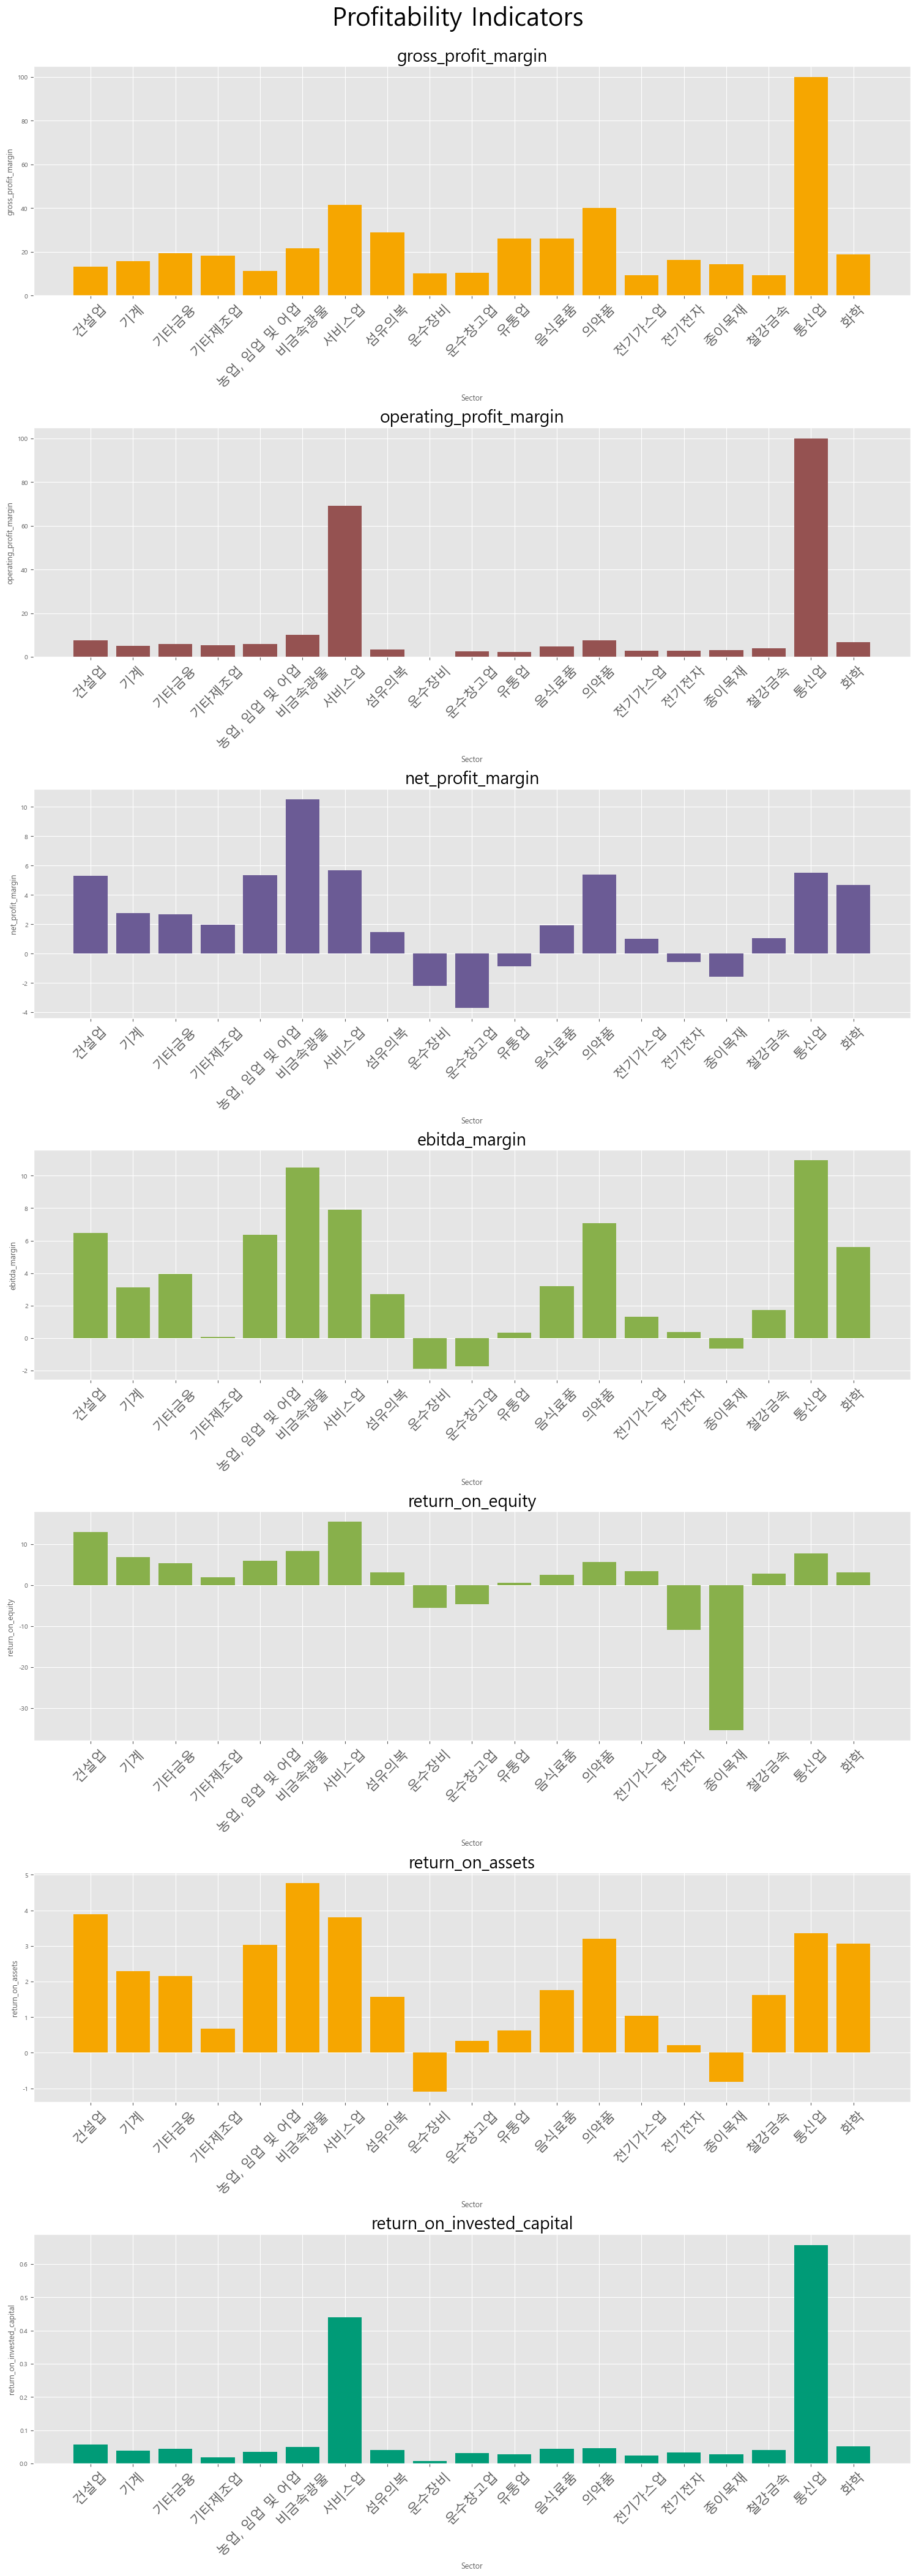

In [31]:
plot_indicators(profitability, 'Profitability', colors)

## 안정성 지표
---
- `부채비율` : 대체적으로 평이함, 종이목재 1등
- `유동비율` : 의외로 의약품이 1등
- `당좌비율` : 의약품, 서비스업 1등
- `비유동부채비율` : 운수창고업, 전기가스업 1등
- `자기자본비율` : 비금속광물, 의약품 1등
- `이자보상배율` : 건설업 독보적 1등
- `차입금비율` : 종이목재 독보적 1등
- `순부채비율` : 종이목재, 기타제조업 1,2등
- `자본유보율` : 전기전자 1등 종이목재 꼴등


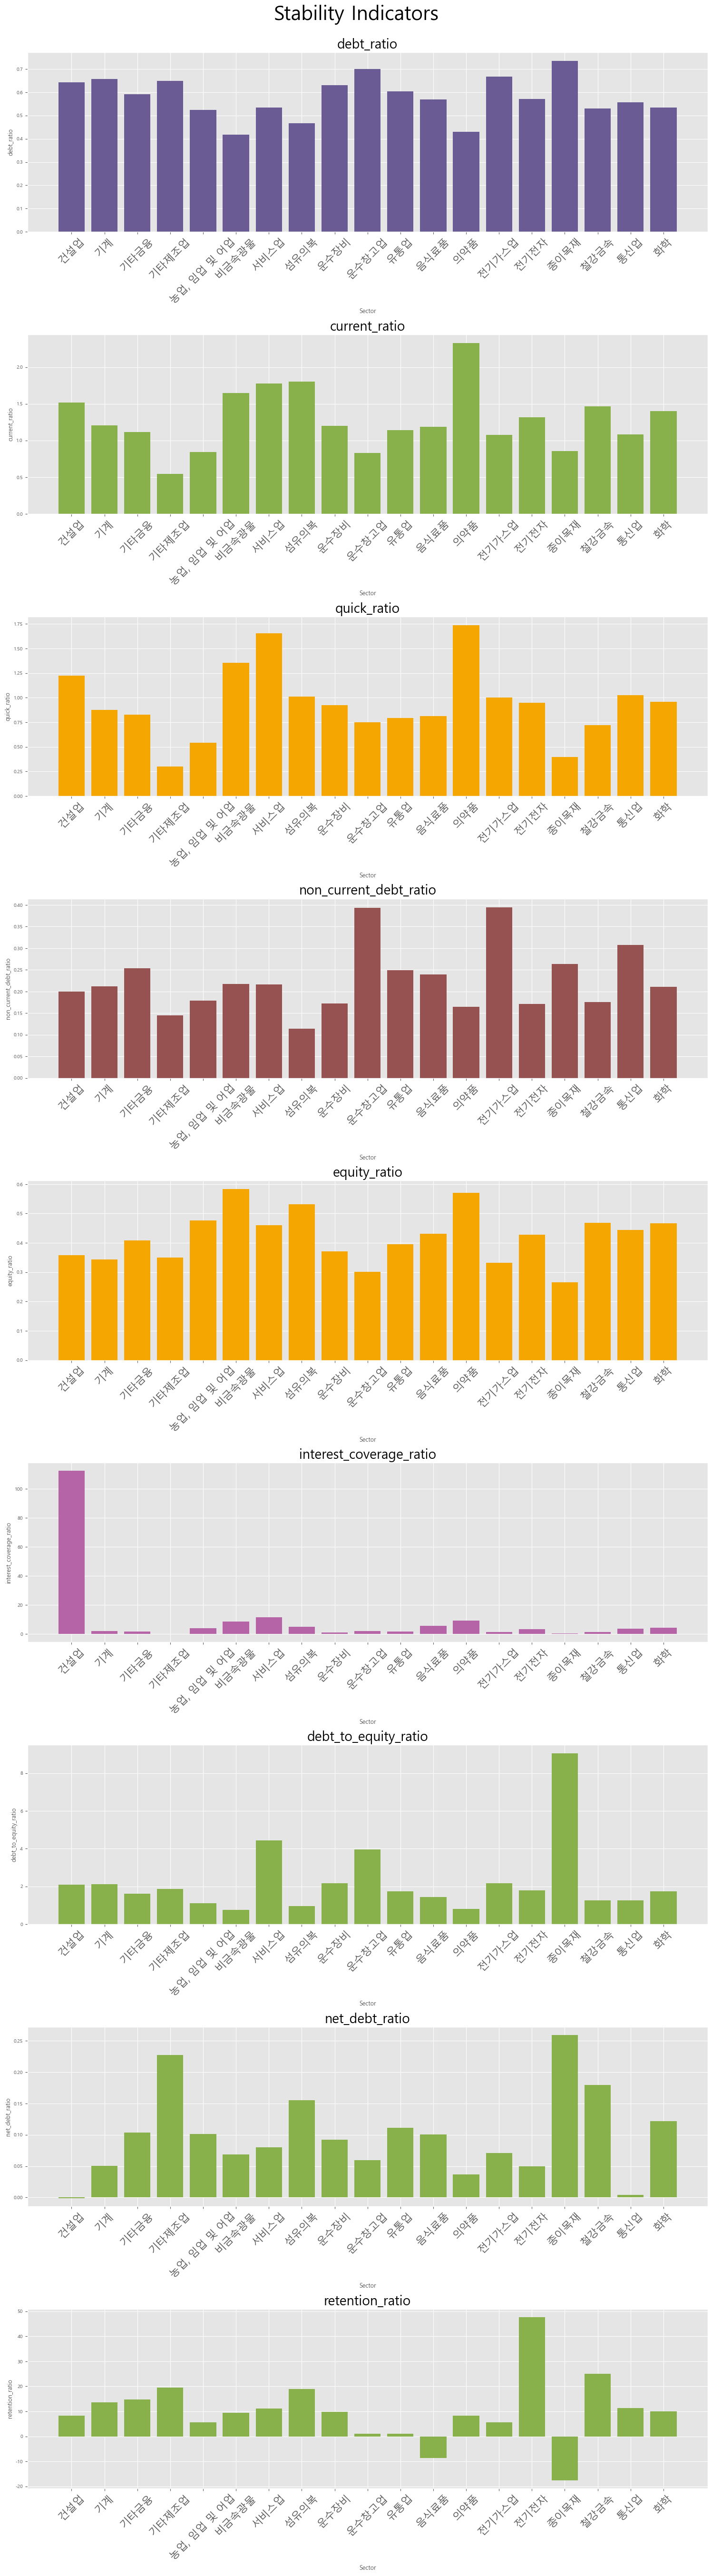

In [36]:
plot_indicators(stability, 'Stability', colors)

## 활동성 지표
---

- `총자산회전율` : 대체적으로 평이. 섬유의복, 유통업 1등 기타제조업 꼴등
- `자기자본회전율` : 종이목재 꼴등
- `순운전자본회전율` : 통신업, 기계 1,2등
- `유형자산회전율` : 건설업 압도적 1등
- `매출채권회전율` : 서비스업 1등
- `재고자산회전율` : 서비스업 압도적 1등
- `매입채무회전율` : 서비스업 압도적 1등

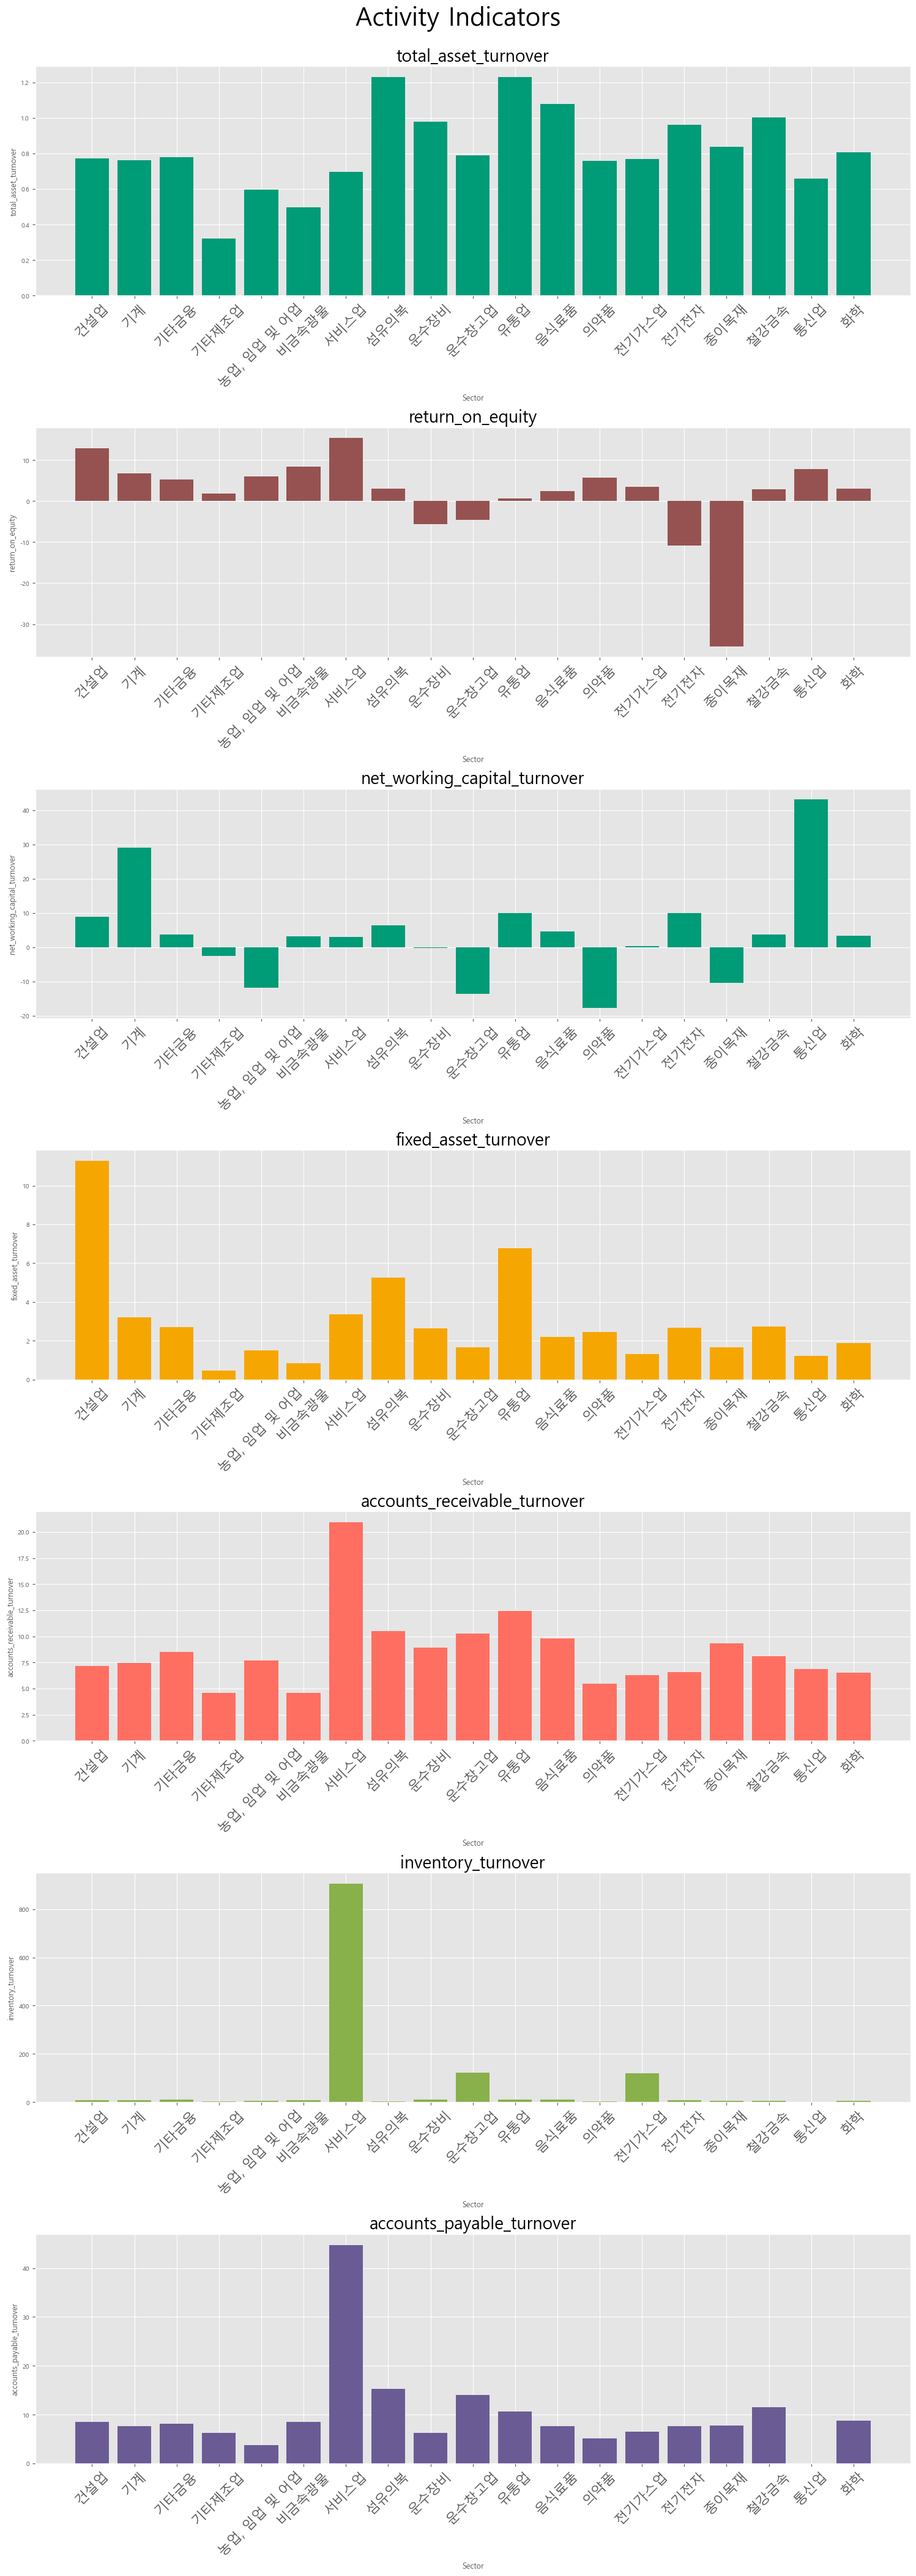

In [33]:
plot_indicators(activity, 'Activity', colors)

## 가치 지표
---
- 'EPS' : 철강금속 압도적 1등
- 'BPS' : 철강금속 압도적 1등
- 'PER' : 기타제조업 1등, 전기가스업 꼴등
- 'PBR' : 의약품 서비스업 종이목재 1,2,3 등
- 'PCR' : 농업, 임업, 및 어업 압도적 꼴등
- 'EV/EBITDA' : 의약품, 전기가스업 꼴등

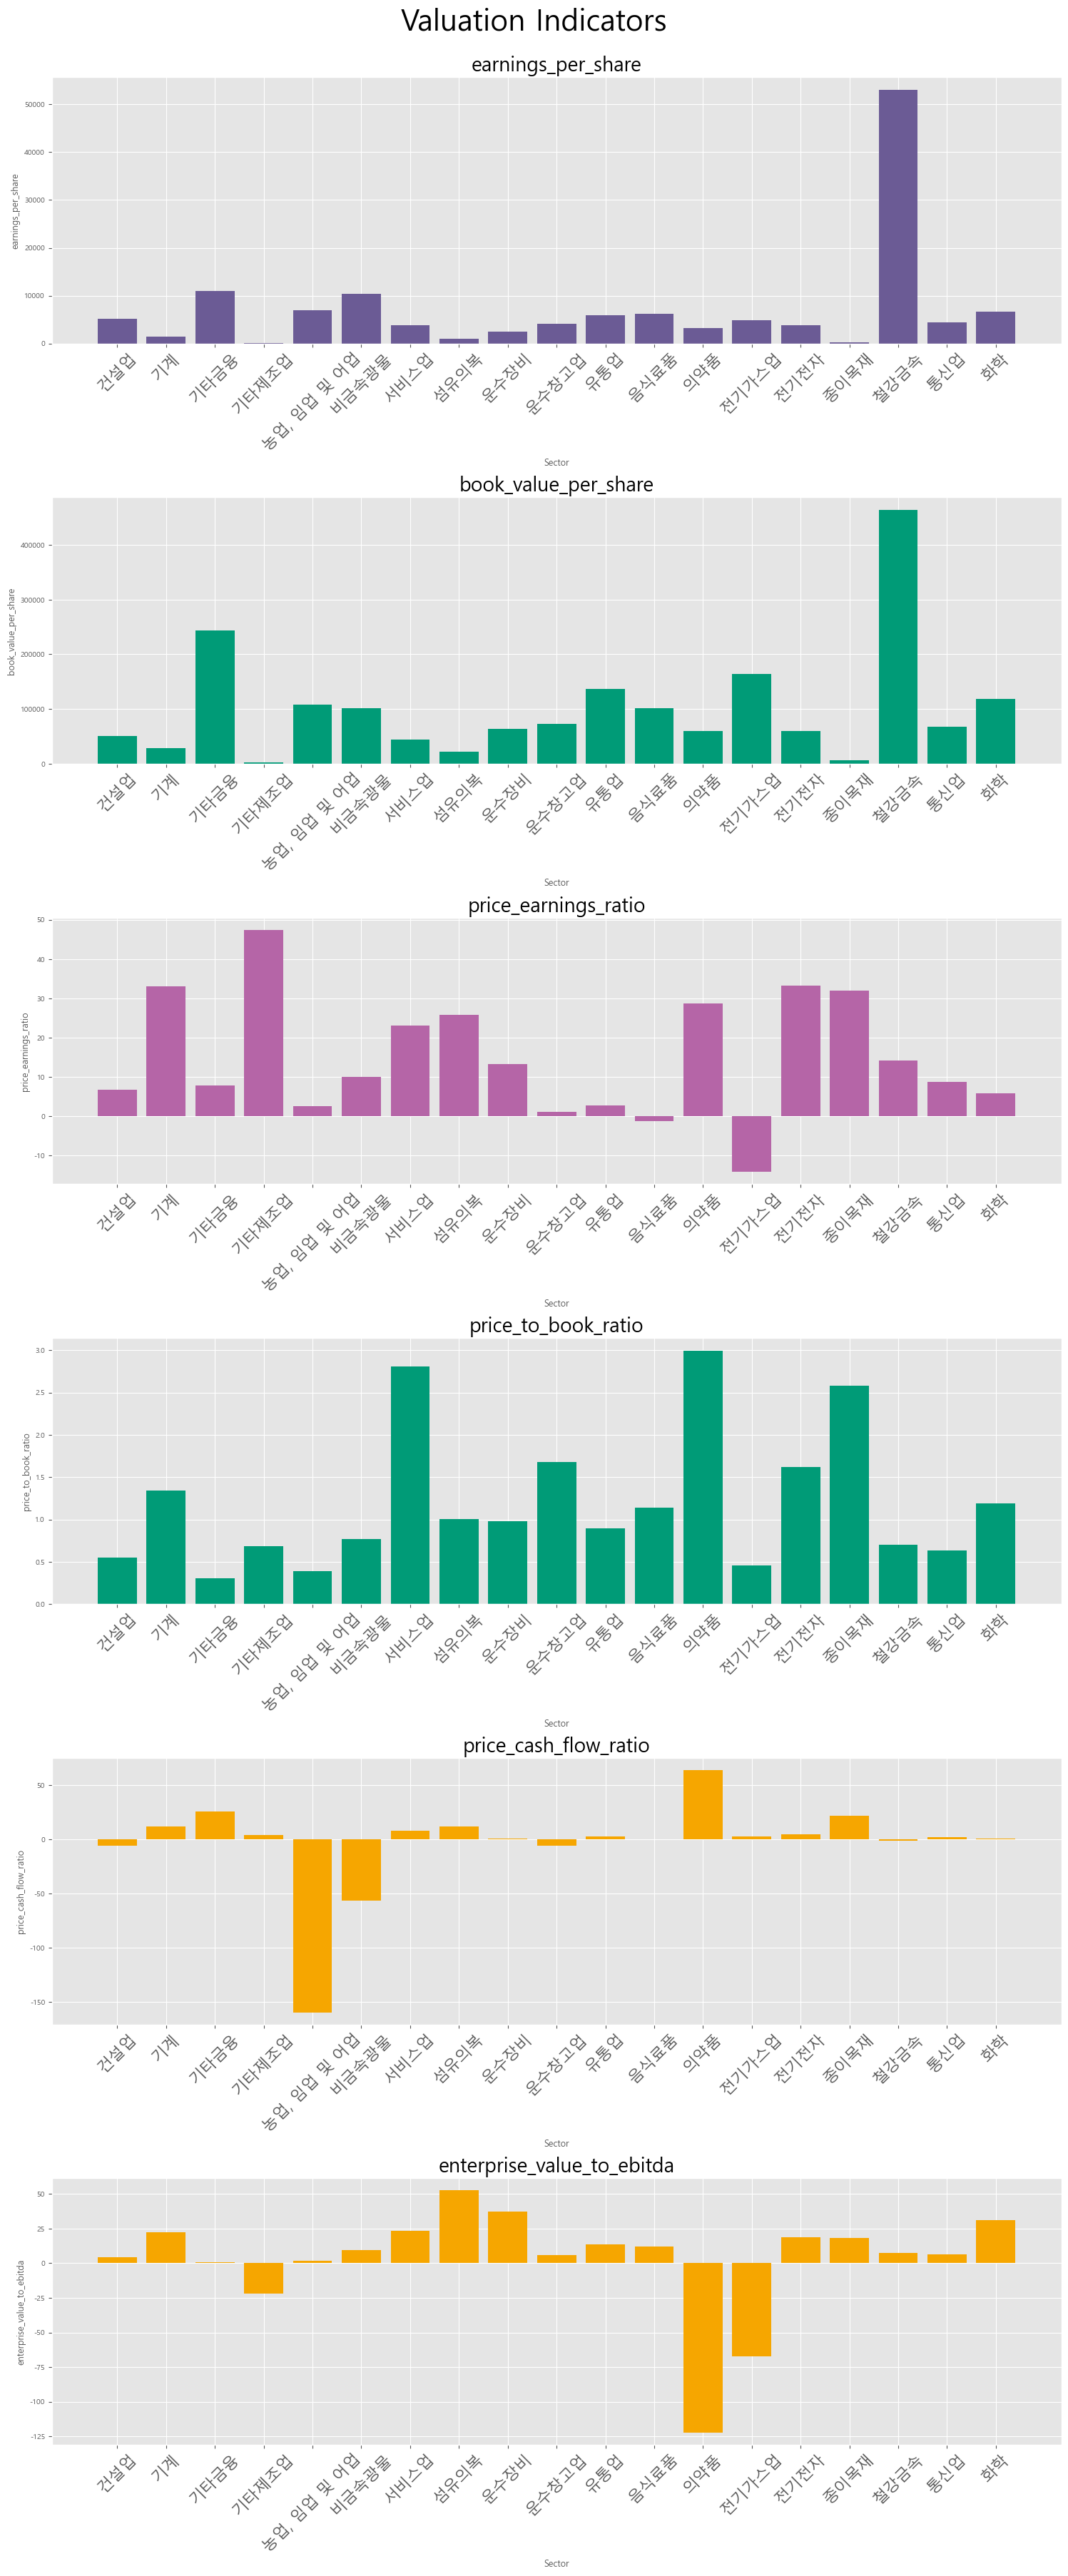

In [34]:
plot_indicators(valuation, 'Valuation', colors)

## 산업별로 평점(별점) 어떻게 차이가 날까?
---
| 별점 (rating)             |
|----------------------------------|
| 총 별점 (rating) |
| 별점 총 수 (count)  |
| 임금 및 복지 (paywellfare)       |
| 업무와 삶의 균형 (worklifebal)      |
| 사내 문화 (culture)            |
| 승진 가능성 및 기회 (opportunity)          |
| 경연진 평 (manager) |
| 기업 추천도 (recommend) |
| CED 지지율 (ceo) |
| 성장 잠재성 (potential) |       

---
> 큰 차이는 확인 할 수 없으나. 기타제조업, 농업,임업 및 어업 두 산업이 대체적으로 낮은 평가를 받고 있는 것을 확인 할 수 있다.


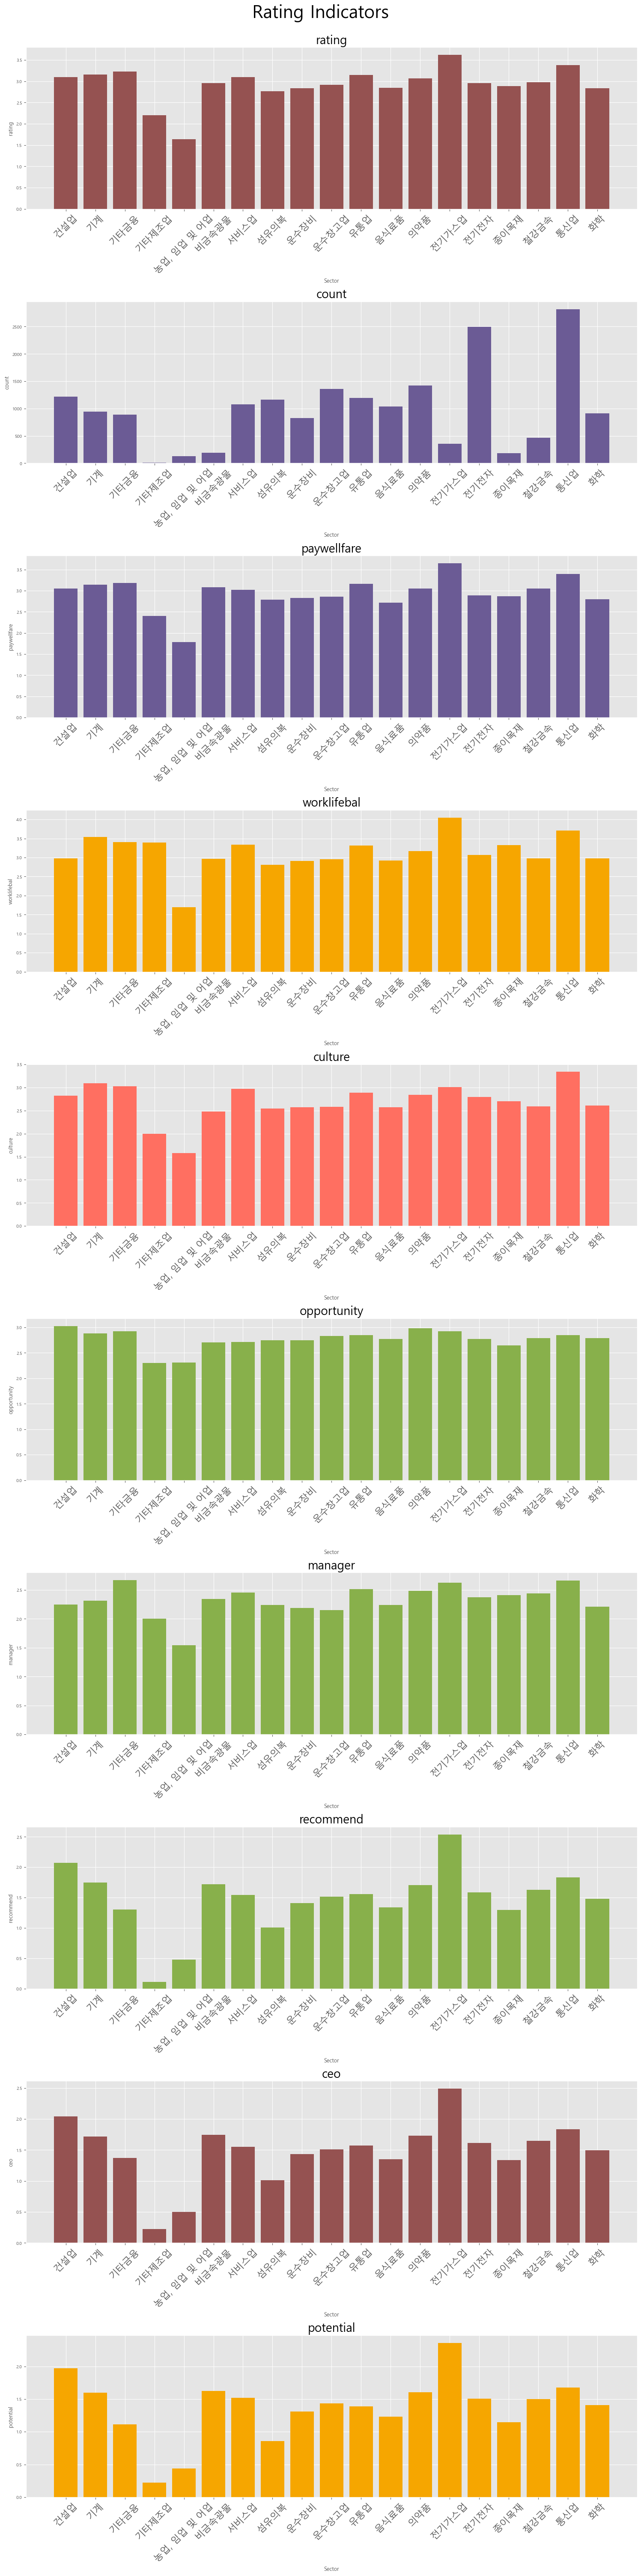

In [42]:
rating = ['rating', 'count',
       'paywellfare', 'worklifebal', 'culture', 'opportunity', 'manager',
       'recommend', 'ceo', 'potential']

plot_indicators(rating, 'Rating', colors)